# Stock Market Analysis

📊 Dataset: S&P 500 Stock Data

Skills: Time series, rolling statistics, visualization

Questions to answer:

    1. Load stock prices and calculate daily returns for Apple, Google, and Amazon.

    2. What was the average monthly return for Apple in 2020?

    3. Plot the closing prices of top 5 companies over the last 10 years.

    4. Which stock had the highest volatility in 2019?

    5. Compute 7-day and 30-day moving averages for Tesla.

    6. Compare Tesla’s average return before and after March 2020 (COVID crash).

    7. Which company has grown the most (percentage increase) since IPO?

    8. Create a correlation heatmap of returns between all companies.

    9. Simulate a portfolio of 3 stocks with equal weights and plot cumulative returns.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the data
stock_data = pd.read_csv('data/all_stocks_5yr.csv')
stock_data.head(20)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL


In [4]:
stock_data.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [5]:
# drop all the Nan

stock_data = stock_data.dropna()

In [6]:
stock_data.describe()

,open,high,low,close,volume
count,619029.000000,619029.000000,619029.000000,619029.000000,6.190290e+05
mean,83.023334,83.778419,82.256200,83.043305,4.321892e+06
std,97.378769,98.207735,96.507634,97.388913,8.693671e+06
min,1.620000,1.690000,1.500000,1.590000,1.010000e+02
25%,40.220000,40.620000,39.830000,40.240800,1.070351e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082165e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284550e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619029 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619029 non-null  object 
 1   open    619029 non-null  float64
 2   high    619029 non-null  float64
 3   low     619029 non-null  float64
 4   close   619029 non-null  float64
 5   volume  619029 non-null  int64  
 6   Name    619029 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 37.8+ MB


In [8]:
stock_data.head(10)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL


In [9]:
stock_data.tail(10)

,date,open,high,low,close,volume,Name
619030,2018-01-25,78.47,79.38,78.345,79.25,2327262,ZTS
619031,2018-01-26,79.49,80.13,79.380,80.09,2532808,ZTS
619032,2018-01-29,79.81,79.95,79.110,79.18,2662383,ZTS
619033,2018-01-30,78.44,78.69,77.910,78.35,3808707,ZTS
619034,2018-01-31,78.49,78.77,76.540,76.73,4136360,ZTS
619035,2018-02-01,76.84,78.27,76.690,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.730,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.180,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.130,73.27,4924323,ZTS
619039,2018-02-07,72.70,75.00,72.690,73.86,4534912,ZTS


In [10]:
#  Sort the stock by volume

stock_data.sort_values(by='volume', ascending=False).head(5)

,date,open,high,low,close,volume,Name
584118,2014-02-24,47.020,47.20,46.23,46.230,618237630,VZ
243453,2015-11-17,30.570,30.75,30.00,30.320,431332632,GE
73627,2016-02-11,11.460,11.55,10.99,11.160,375088650,BAC
218724,2013-07-25,33.545,34.88,32.75,34.359,365380568,FB
243299,2015-04-10,27.130,28.68,27.00,28.510,352701949,GE


In [11]:
stock_data['Close Difference'] = stock_data['close'] - stock_data['open']
stock_data

,date,open,high,low,close,volume,Name,Close Difference
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,-0.32
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-0.43
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-0.18
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,0.36
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-0.95
...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,0.98
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,-0.75
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,-2.81
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,0.53


In [12]:
stock_data['High Low Diff'] = stock_data['high'] - stock_data['low']
stock_data

,date,open,high,low,close,volume,Name,Close Difference,High Low Diff
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,-0.32,0.49
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-0.43,0.75
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-0.18,0.41
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,0.36,0.69
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-0.95,1.80
...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,0.98,1.58
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,-0.75,1.39
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,-2.81,3.74
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,0.53,2.43


In [13]:
stock_data.sort_values(by='volume', ascending=False).head(5)

,date,open,high,low,close,volume,Name,Close Difference,High Low Diff
584118,2014-02-24,47.020,47.20,46.23,46.230,618237630,VZ,-0.790,0.97
243453,2015-11-17,30.570,30.75,30.00,30.320,431332632,GE,-0.250,0.75
73627,2016-02-11,11.460,11.55,10.99,11.160,375088650,BAC,-0.300,0.56
218724,2013-07-25,33.545,34.88,32.75,34.359,365380568,FB,0.814,2.13
243299,2015-04-10,27.130,28.68,27.00,28.510,352701949,GE,1.380,1.68


#### 1. Load stock prices and calculate daily returns for Apple, Google, and Amazon

To calculate a stock's daily return, you divide the stock's closing price on the current day by its closing price on the previous day, then subtract one, resulting in a decimal value you can convert to a percentage by multiplying by 100. Alternatively, you can find the percentage gain or loss by finding the difference between the opening and closing prices, dividing that difference by the opening price, and multiplying by 100. 

In [14]:
stock_data['Daily Returns'] = stock_data['Close Difference'] / stock_data['open'] * 100

In [15]:
stock_data

,date,open,high,low,close,volume,Name,Close Difference,High Low Diff,Daily Returns
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,-0.32,0.49,-2.123424
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-0.43,0.75,-2.887844
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-0.18,0.41,-1.245675
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,0.36,0.69,2.517483
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-0.95,1.80,-6.358768
...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,0.98,1.58,1.275377
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,-0.75,1.39,-0.967367
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,-2.81,3.74,-3.666493
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,0.53,2.43,0.728622


In [16]:
stock_data[stock_data['Name'] == 'AAL']

,date,open,high,low,close,volume,Name,Close Difference,High Low Diff,Daily Returns
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,-0.32,0.49,-2.123424
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-0.43,0.75,-2.887844
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-0.18,0.41,-1.245675
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,0.36,0.69,2.517483
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-0.95,1.80,-6.358768
...,...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,54.00,54.64,53.59,53.88,3623078,AAL,-0.12,1.05,-0.222222
1255,2018-02-02,53.49,53.99,52.03,52.10,5109361,AAL,-1.39,1.96,-2.598617
1256,2018-02-05,51.99,52.39,49.75,49.76,6878284,AAL,-2.23,2.64,-4.289286
1257,2018-02-06,49.32,51.50,48.79,51.18,6782480,AAL,1.86,2.71,3.771290


In [17]:
stock_data['Daily Returns2'] = stock_data['close'].pct_change() * 100

In [18]:
stock_data.drop('Daily Returns', axis=1)
stock_data

,date,open,high,low,close,volume,Name,Close Difference,High Low Diff,Daily Returns,Daily Returns2
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,-0.32,0.49,-2.123424,NaN
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-0.43,0.75,-2.887844,-1.966102
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-0.18,0.41,-1.245675,-1.313970
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,0.36,0.69,2.517483,2.733006
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-0.95,1.80,-6.358768,-4.570259
...,...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,0.98,1.58,1.275377,1.420566
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,-0.75,1.39,-0.967367,-1.336417
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,-2.81,3.74,-3.666493,-3.842146
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,0.53,2.43,0.728622,-0.758499


In [19]:
apple = stock_data[stock_data['Name'] == 'AAPL'].head(30)
apple

,date,open,high,low,close,volume,Name,Close Difference,High Low Diff,Daily Returns,Daily Returns2
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,1.5086,0.206751,32.012062
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,1.6700,0.719832,1.042235
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,2.0909,-2.421264,-2.506658
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,1.4886,-0.042850,-0.190297
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,1.0886,0.445600,-0.089934
1264,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL,-1.2414,1.4628,-1.853431,-1.377979
1265,2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL,-0.1586,1.2686,-0.240772,-0.036965
1266,2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL,-1.2628,1.2700,-1.931353,-2.421750
1267,2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,AAPL,0.0086,0.9072,0.013498,-0.621633
1268,2013-02-22,64.1785,64.5142,63.7999,64.4014,82583823,AAPL,0.2229,0.7143,0.347313,1.064925


In [20]:
apple = stock_data[stock_data['Name'] == 'GOOG'].head(30)
apple

,date,open,high,low,close,volume,Name,Close Difference,High Low Diff,Daily Returns,Daily Returns2
251567,2014-03-27,568.000,568.0000,552.9200,558.46,13052,GOOG,-9.540,15.0800,-1.679577,-47.085967
251568,2014-03-28,561.200,566.4300,558.6700,559.99,41003,GOOG,-1.210,7.7600,-0.215609,0.273968
251569,2014-03-31,566.890,567.0000,556.9300,556.97,10772,GOOG,-9.920,10.0700,-1.749899,-0.539295
251570,2014-04-01,558.710,568.4500,558.7100,567.16,7932,GOOG,8.450,9.7400,1.512413,1.829542
251571,2014-04-02,565.106,604.8300,562.1900,567.00,146697,GOOG,1.894,42.6400,0.335158,-0.028211
251572,2014-04-03,569.850,587.2800,564.1300,569.74,5087530,GOOG,-0.110,23.1500,-0.019303,0.483245
251573,2014-04-04,574.650,577.7700,543.0000,543.14,6377658,GOOG,-31.510,34.7700,-5.483338,-4.668796
251574,2014-04-07,540.740,548.4800,527.1500,538.15,4389569,GOOG,-2.590,21.3300,-0.478973,-0.918732
251575,2014-04-08,542.600,555.0000,541.6100,554.90,3152406,GOOG,12.300,13.3900,2.266863,3.112515
251576,2014-04-09,559.620,565.3700,552.9500,564.14,3324742,GOOG,4.520,12.4200,0.807691,1.665165


In [21]:
amazon = stock_data[stock_data['Name']  == 'AMZN']
amazon.head(20)

,date,open,high,low,close,volume,Name,Close Difference,High Low Diff,Daily Returns,Daily Returns2
46387,2013-02-08,261.40,265.250,260.555,261.95,3879078,AMZN,0.55,4.695,0.210406,87.107143
46388,2013-02-11,263.20,263.250,256.600,257.21,3403403,AMZN,-5.99,6.650,-2.275836,-1.809506
46389,2013-02-12,259.19,260.160,257.000,258.70,2938660,AMZN,-0.49,3.160,-0.189051,0.579293
46390,2013-02-13,261.53,269.960,260.300,269.47,5292996,AMZN,7.94,9.660,3.035981,4.163123
46391,2013-02-14,267.37,270.650,265.400,269.24,3462780,AMZN,1.87,5.250,0.699405,-0.085353
46392,2013-02-15,267.63,268.920,263.110,265.09,3979832,AMZN,-2.54,5.810,-0.949071,-1.541376
46393,2013-02-19,265.91,270.110,264.500,269.75,2853752,AMZN,3.84,5.610,1.444098,1.757894
46394,2013-02-20,270.20,274.300,266.371,266.41,3528862,AMZN,-3.79,7.929,-1.402665,-1.238184
46395,2013-02-21,265.12,269.480,263.250,265.94,3637396,AMZN,0.82,6.230,0.309294,-0.176420
46396,2013-02-22,266.62,267.110,261.610,265.42,3123402,AMZN,-1.20,5.500,-0.450079,-0.195533


In [22]:
companies = ['AMZN', 'GOOG', 'AAPL']
stock_data[stock_data['Name'].isin(companies)]

,date,open,high,low,close,volume,Name,Close Difference,High Low Diff,Daily Returns,Daily Returns2
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,1.5086,0.206751,32.012062
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,1.6700,0.719832,1.042235
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,2.0909,-2.421264,-2.506658
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,1.4886,-0.042850,-0.190297
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,1.0886,0.445600,-0.089934
...,...,...,...,...,...,...,...,...,...,...,...
252537,2018-02-01,1162.6100,1174.0000,1157.5200,1167.7000,2412114,GOOG,5.0900,16.4800,0.437808,-0.191463
252538,2018-02-02,1122.0000,1123.0700,1107.2800,1111.9000,4857943,GOOG,-10.1000,15.7900,-0.900178,-4.778625
252539,2018-02-05,1090.6000,1110.0000,1052.0300,1055.8000,3798301,GOOG,-34.8000,57.9700,-3.190904,-5.045418
252540,2018-02-06,1027.1800,1081.7100,1023.1400,1080.6000,3447956,GOOG,53.4200,58.5700,5.200646,2.348930


## 2. What was the average monthly return for Apple in 2020?

In [23]:
apple_data = stock_data[stock_data['Name'] == 'AAPL']
apple_data.head(30)

,date,open,high,low,close,volume,Name,Close Difference,High Low Diff,Daily Returns,Daily Returns2
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,1.5086,0.206751,32.012062
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,1.6700,0.719832,1.042235
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,2.0909,-2.421264,-2.506658
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,1.4886,-0.042850,-0.190297
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,1.0886,0.445600,-0.089934
1264,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL,-1.2414,1.4628,-1.853431,-1.377979
1265,2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL,-0.1586,1.2686,-0.240772,-0.036965
1266,2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL,-1.2628,1.2700,-1.931353,-2.421750
1267,2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,AAPL,0.0086,0.9072,0.013498,-0.621633
1268,2013-02-22,64.1785,64.5142,63.7999,64.4014,82583823,AAPL,0.2229,0.7143,0.347313,1.064925


In [24]:
apple_data['date'] = apple_data['date'].apply(lambda x: str(x))


/tmp/ipykernel_1090155/1789702220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_data['date'] = apple_data['date'].apply(lambda x: str(x))


In [25]:
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 1259 to 2517
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              1259 non-null   object 
 1   open              1259 non-null   float64
 2   high              1259 non-null   float64
 3   low               1259 non-null   float64
 4   close             1259 non-null   float64
 5   volume            1259 non-null   int64  
 6   Name              1259 non-null   object 
 7   Close Difference  1259 non-null   float64
 8   High Low Diff     1259 non-null   float64
 9   Daily Returns     1259 non-null   float64
 10  Daily Returns2    1259 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 118.0+ KB


In [26]:
apple_data.index = pd.to_datetime(apple_data.index)


In [27]:
apple_daily_returns = apple_data['Daily Returns2']
apple_monthly_returns = apple_daily_returns.resample('M').apply(lambda x: (1 + x).prod() - 1)
avg_mean = apple_monthly_returns.mean()


print("Monthly Returns in 2020:\n", apple_monthly_returns)
print("\nAverage Monthly Return for AAPL in 2020: {:.2%}".format(avg_mean))

Monthly Returns in 2020:
 1970-01-31   -0.999991
Freq: M, Name: Daily Returns2, dtype: float64

Average Monthly Return for AAPL in 2020: -100.00%


## 3. Plot the closing prices of top 5 companies over the last 10 years.

In [28]:
sorted_by_closing = stock_data.sort_values(by='close')
sorted_by_closing.head(10)

,date,open,high,low,close,volume,Name,Close Difference,High Low Diff,Daily Returns,Daily Returns2
115059,2016-02-12,1.86,1.890,1.56,1.59,49579181,CHK,-0.27,0.330,-14.516129,-10.674157
39452,2015-07-27,1.67,1.700,1.61,1.62,11916468,AMD,-0.05,0.090,-2.994012,-2.994012
39496,2015-09-28,1.69,1.700,1.66,1.66,5693063,AMD,-0.03,0.040,-1.775148,-2.923977
39473,2015-08-25,1.82,1.820,1.66,1.66,12097696,AMD,-0.16,0.160,-8.791209,-5.142857
39451,2015-07-24,1.76,1.770,1.65,1.67,16478376,AMD,-0.09,0.120,-5.113636,-5.113636
39497,2015-09-29,1.67,1.690,1.65,1.67,7005323,AMD,0.00,0.040,0.000000,0.602410
39470,2015-08-20,1.79,1.800,1.70,1.70,13745659,AMD,-0.09,0.100,-5.027933,-5.555556
115057,2016-02-10,1.99,2.005,1.63,1.70,32507974,CHK,-0.29,0.375,-14.572864,-12.820513
39493,2015-09-23,1.76,1.775,1.69,1.70,9649200,AMD,-0.06,0.085,-3.409091,-1.734104
39495,2015-09-25,1.75,1.750,1.68,1.71,5644642,AMD,-0.04,0.070,-2.285714,-0.581395


In [29]:
sorted_by_closing['date'] = pd.to_datetime(sorted_by_closing['date'])
sorted_by_closing

,date,open,high,low,close,volume,Name,Close Difference,High Low Diff,Daily Returns,Daily Returns2
115059,2016-02-12,1.86,1.89,1.56,1.59,49579181,CHK,-0.27,0.33,-14.516129,-10.674157
39452,2015-07-27,1.67,1.70,1.61,1.62,11916468,AMD,-0.05,0.09,-2.994012,-2.994012
39496,2015-09-28,1.69,1.70,1.66,1.66,5693063,AMD,-0.03,0.04,-1.775148,-2.923977
39473,2015-08-25,1.82,1.82,1.66,1.66,12097696,AMD,-0.16,0.16,-8.791209,-5.142857
39451,2015-07-24,1.76,1.77,1.65,1.67,16478376,AMD,-0.09,0.12,-5.113636,-5.113636
...,...,...,...,...,...,...,...,...,...,...,...
441187,2017-07-31,2030.00,2033.00,2010.24,2028.50,503331,PCLN,-1.50,22.76,-0.073892,0.219361
441191,2017-08-04,2031.02,2035.47,2020.29,2032.77,333534,PCLN,1.75,15.18,0.086164,0.236196
441184,2017-07-26,2019.24,2037.00,2017.56,2033.21,311753,PCLN,13.97,19.44,0.691844,0.808167
441192,2017-08-07,2034.73,2044.51,2022.00,2042.64,402270,PCLN,7.91,22.51,0.388749,0.485544


In [30]:
sorted_by_closing

,date,open,high,low,close,volume,Name,Close Difference,High Low Diff,Daily Returns,Daily Returns2
115059,2016-02-12,1.86,1.89,1.56,1.59,49579181,CHK,-0.27,0.33,-14.516129,-10.674157
39452,2015-07-27,1.67,1.70,1.61,1.62,11916468,AMD,-0.05,0.09,-2.994012,-2.994012
39496,2015-09-28,1.69,1.70,1.66,1.66,5693063,AMD,-0.03,0.04,-1.775148,-2.923977
39473,2015-08-25,1.82,1.82,1.66,1.66,12097696,AMD,-0.16,0.16,-8.791209,-5.142857
39451,2015-07-24,1.76,1.77,1.65,1.67,16478376,AMD,-0.09,0.12,-5.113636,-5.113636
...,...,...,...,...,...,...,...,...,...,...,...
441187,2017-07-31,2030.00,2033.00,2010.24,2028.50,503331,PCLN,-1.50,22.76,-0.073892,0.219361
441191,2017-08-04,2031.02,2035.47,2020.29,2032.77,333534,PCLN,1.75,15.18,0.086164,0.236196
441184,2017-07-26,2019.24,2037.00,2017.56,2033.21,311753,PCLN,13.97,19.44,0.691844,0.808167
441192,2017-08-07,2034.73,2044.51,2022.00,2042.64,402270,PCLN,7.91,22.51,0.388749,0.485544


In [31]:
sorted_by_closing.sort_values(by='date')

data = sorted_by_closing.loc['2013-01-01':'2018-01-01']

data

KeyError: '2013-01-01'

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
for ticker in ['AAPL', 'MSFT', 'AMZN', 'GOOG', 'TSLA']:
    plt.plot(data.index, data[ticker], label=ticker)

plt.title("Closing Prices of Top 5 Companies (2013–2017)")
plt.xlabel("Year")
plt.ylabel("Adjusted Closing Price (USD)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [ ]:
data['Name']

date
2016-02-12     CHK
2015-07-27     AMD
2015-09-28     AMD
2015-08-25     AMD
2015-07-24     AMD
              ... 
2017-07-31    PCLN
2017-08-04    PCLN
2017-07-26    PCLN
2017-08-07    PCLN
2017-08-08    PCLN
Name: Name, Length: 605899, dtype: object

## 4. Which stock had the highest volatility in 2016?

In [ ]:

data_2016 = data.loc['2016-01-01': '2017-12-31']
# daily_returns = data_2016.pct_change().dropna()
# daily_returns

data_2016

,Date,Price,Close,High,Low,Volume,Daily Returns,Daily_Returns
2017,2012-08-21,16.561913,16.771932,16.38034,16.650968,89221174,1.268085,-0.001281


In [ ]:
most_volatile = standard_dev.idxmax()
most_volatile

NameError: name 'standard_dev' is not defined

In [ ]:
data.describe()

,open,high,low,close,volume,Close Difference,High Low Diff,Daily Returns,Daily Returns2
count,605899.000000,605899.000000,605899.000000,605899.000000,6.058990e+05,605899.000000,605899.000000,605899.000000,605898.000000
mean,82.411652,83.156189,81.653922,82.431243,4.310976e+06,0.019591,1.502267,0.036020,0.055935
std,96.092835,96.894214,95.238449,96.095543,8.671901e+06,1.519536,2.113687,1.318013,4.697351
min,1.620000,1.690000,1.500000,1.590000,1.010000e+02,-100.980000,-0.255000,-49.218528,-98.792760
25%,40.080000,40.470600,39.680000,40.100000,1.066754e+06,-0.360000,0.605000,-0.622629,-0.677674
50%,62.280000,62.860000,61.730000,62.320000,2.075469e+06,0.020000,0.985000,0.044964,0.062742
75%,93.680000,94.490000,92.877500,93.710000,4.272856e+06,0.420000,1.650000,0.709220,0.807754
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08,52.950000,109.900000,80.580714,1966.435986


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 605899 entries, 2016-02-12 to 2017-08-08
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   open              605899 non-null  float64
 1   high              605899 non-null  float64
 2   low               605899 non-null  float64
 3   close             605899 non-null  float64
 4   volume            605899 non-null  int64  
 5   Name              605899 non-null  object 
 6   Close Difference  605899 non-null  float64
 7   High Low Diff     605899 non-null  float64
 8   Daily Returns     605899 non-null  float64
 9   Daily Returns2    605898 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 67.0+ MB


In [ ]:
data.head(6)

,open,high,low,close,volume,Name,Close Difference,High Low Diff,Daily Returns,Daily Returns2
date,,,,,,,,,,
2016-02-12,1.86,1.89,1.56,1.59,49579181,CHK,-0.27,0.33,-14.516129,-10.674157
2015-07-27,1.67,1.70,1.61,1.62,11916468,AMD,-0.05,0.09,-2.994012,-2.994012
2015-09-28,1.69,1.70,1.66,1.66,5693063,AMD,-0.03,0.04,-1.775148,-2.923977
2015-08-25,1.82,1.82,1.66,1.66,12097696,AMD,-0.16,0.16,-8.791209,-5.142857
2015-07-24,1.76,1.77,1.65,1.67,16478376,AMD,-0.09,0.12,-5.113636,-5.113636
2015-09-29,1.67,1.69,1.65,1.67,7005323,AMD,0.00,0.04,0.000000,0.602410


In [ ]:
data.loc['2016-01-01': '2016-12-12']

/tmp/ipykernel_685295/3556251370.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  data.loc['2016-01-01': '2016-12-12']


,open,high,low,close,volume,Name,Close Difference,High Low Diff,Daily Returns,Daily Returns2
date,,,,,,,,,,
2016-02-12,1.86,1.890,1.56,1.59,49579181,CHK,-0.27,0.330,-14.516129,-10.674157
2016-02-10,1.99,2.005,1.63,1.70,32507974,CHK,-0.29,0.375,-14.572864,-12.820513
2016-02-11,1.66,1.810,1.53,1.78,50804186,CHK,0.12,0.280,7.228916,4.705882
2016-01-20,1.81,1.950,1.75,1.80,29243601,AMD,-0.01,0.200,-0.552486,-7.692308
2016-02-16,1.86,1.900,1.82,1.83,11853372,AMD,-0.03,0.080,-1.612903,0.000000
...,...,...,...,...,...,...,...,...,...,...
2016-12-08,1535.36,1551.770,1522.76,1548.67,506505,PCLN,13.31,29.010,0.866898,1.416466
2016-11-10,1584.44,1600.930,1520.30,1554.32,1102306,PCLN,-30.12,80.630,-1.900987,-1.015119
2016-12-09,1555.50,1559.180,1549.94,1557.98,333919,PCLN,2.48,9.240,0.159434,0.601161


In [ ]:
data.loc['2016-01-01': '2016-12-12']

/tmp/ipykernel_685295/3556251370.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  data.loc['2016-01-01': '2016-12-12']


,open,high,low,close,volume,Name,Close Difference,High Low Diff,Daily Returns,Daily Returns2
date,,,,,,,,,,
2016-02-12,1.86,1.890,1.56,1.59,49579181,CHK,-0.27,0.330,-14.516129,-10.674157
2016-02-10,1.99,2.005,1.63,1.70,32507974,CHK,-0.29,0.375,-14.572864,-12.820513
2016-02-11,1.66,1.810,1.53,1.78,50804186,CHK,0.12,0.280,7.228916,4.705882
2016-01-20,1.81,1.950,1.75,1.80,29243601,AMD,-0.01,0.200,-0.552486,-7.692308
2016-02-16,1.86,1.900,1.82,1.83,11853372,AMD,-0.03,0.080,-1.612903,0.000000
...,...,...,...,...,...,...,...,...,...,...
2016-12-08,1535.36,1551.770,1522.76,1548.67,506505,PCLN,13.31,29.010,0.866898,1.416466
2016-11-10,1584.44,1600.930,1520.30,1554.32,1102306,PCLN,-30.12,80.630,-1.900987,-1.015119
2016-12-09,1555.50,1559.180,1549.94,1557.98,333919,PCLN,2.48,9.240,0.159434,0.601161


5. Compute 7-day and 30-day moving averages for Google.

In [ ]:
google_data = data[data['Name'] == 'GOOG']

google_data['Google_7d_MA'] = google_data['close'].rolling(window=7).mean()
google_data['Google_30d_MA'] = google_data['close'].rolling(window=30).mean()

# Preview
google_data['Google_7d_MA'].dropna()

google_data.head(10)

/tmp/ipykernel_685295/1919403591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_data['Google_7d_MA'] = google_data['close'].rolling(window=7).mean()
/tmp/ipykernel_685295/1919403591.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_data['Google_30d_MA'] = google_data['close'].rolling(window=30).mean()


,open,high,low,close,volume,Name,Close Difference,High Low Diff,Daily Returns,Daily Returns2,Google_7d_MA,Google_30d_MA
date,,,,,,,,,,,,
2015-01-12,494.94,495.976,487.56,492.55,2320446,GOOG,-2.39,8.416,-0.482887,-0.729589,NaN,NaN
2014-12-16,511.56,513.050,489.00,495.39,3953371,GOOG,-16.17,24.050,-3.160920,-3.583106,NaN,NaN
2015-01-09,504.76,504.920,494.79,496.17,2065715,GOOG,-8.59,10.130,-1.701799,-1.295058,NaN,NaN
2015-01-13,498.84,502.980,492.39,496.18,2365687,GOOG,-2.66,10.590,-0.533237,0.736981,NaN,NaN
2015-01-14,494.65,503.230,493.00,500.87,2229638,GOOG,6.22,10.230,1.257455,0.945221,NaN,NaN
2015-01-07,507.00,507.244,499.65,501.10,2059366,GOOG,-5.90,7.594,-1.163708,-0.171328,NaN,NaN
2015-01-15,505.57,505.680,497.76,501.79,2711355,GOOG,-3.78,7.920,-0.747671,0.183680,497.721429,NaN
2015-01-06,515.00,516.175,501.05,501.96,2891950,GOOG,-13.04,15.125,-2.532039,-2.317707,499.065714,NaN
2015-01-08,497.99,503.480,491.00,502.68,3344395,GOOG,4.69,12.480,0.941786,0.315306,500.107143,NaN


In [ ]:
google_data[['close', 'Google_7d_MA', 'Google_30d_MA']].dropna()


,close,Google_7d_MA,Google_30d_MA
date,,,
2014-05-15,519.98,518.288571,509.193667
2015-06-30,520.51,518.814286,510.125667
2014-05-16,520.63,519.311429,510.967000
2015-07-09,520.68,519.688571,511.784000
2014-10-20,520.84,520.004286,512.606000
...,...,...,...
2017-12-21,1063.63,1054.480000,1038.189667
2017-12-15,1064.19,1056.772857,1039.615667
2017-12-20,1064.95,1059.030000,1041.058667


In [ ]:
google_data

,open,high,low,close,volume,Name,Close Difference,High Low Diff,Daily Returns,Daily Returns2,Google_7d_MA,Google_30d_MA
date,,,,,,,,,,,,
2015-01-12,494.94,495.976,487.56,492.55,2320446,GOOG,-2.39,8.416,-0.482887,-0.729589,NaN,NaN
2014-12-16,511.56,513.050,489.00,495.39,3953371,GOOG,-16.17,24.050,-3.160920,-3.583106,NaN,NaN
2015-01-09,504.76,504.920,494.79,496.17,2065715,GOOG,-8.59,10.130,-1.701799,-1.295058,NaN,NaN
2015-01-13,498.84,502.980,492.39,496.18,2365687,GOOG,-2.66,10.590,-0.533237,0.736981,NaN,NaN
2015-01-14,494.65,503.230,493.00,500.87,2229638,GOOG,6.22,10.230,1.257455,0.945221,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-21,1064.95,1069.330,1061.79,1063.63,995703,GOOG,-1.32,7.540,-0.123949,-0.123949,1054.480000,1038.189667
2017-12-15,1054.61,1067.620,1049.50,1064.19,3275931,GOOG,9.58,18.120,0.908393,1.433541,1056.772857,1039.615667
2017-12-20,1071.78,1073.380,1061.52,1064.95,1268582,GOOG,-6.83,11.860,-0.637258,-0.535174,1059.030000,1041.058667


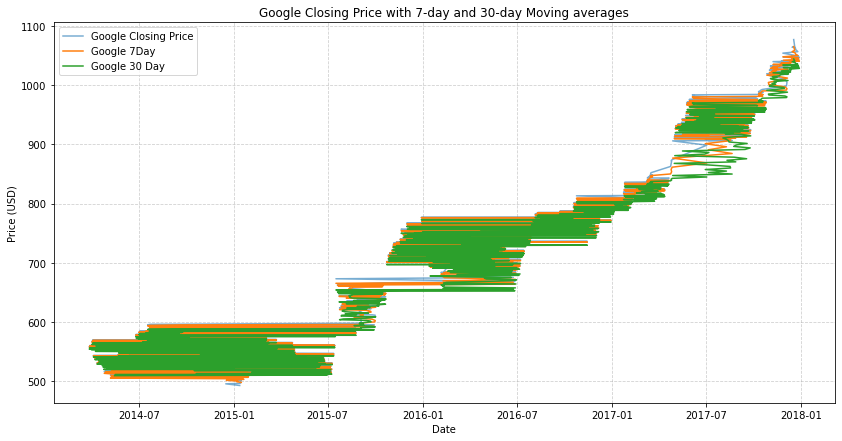

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(google_data.index, google_data['close'], label='Google Closing Price', alpha=0.6)
plt.plot(google_data.index, google_data['Google_7d_MA'], label='Google 7Day ')
plt.plot(google_data.index, google_data['Google_30d_MA'], label='Google 30 Day')
plt.title('Google Closing Price with 7-day and 30-day Moving averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

6. Compare Google's average return before and after March 2020 (COVID crash).

In [ ]:
google_data = stock_data[stock_data['Name'] == 'GOOG']
google_data.head()

,date,open,high,low,close,volume,Name,Close Difference,High Low Diff,Daily Returns,Daily Returns2
251567,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG,-9.540,15.08,-1.679577,-47.085967
251568,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG,-1.210,7.76,-0.215609,0.273968
251569,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG,-9.920,10.07,-1.749899,-0.539295
251570,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG,8.450,9.74,1.512413,1.829542
251571,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG,1.894,42.64,0.335158,-0.028211


In [ ]:
google_data.describe()

,open,high,low,close,volume,Close Difference,High Low Diff,Daily Returns,Daily Returns2
count,975.000000,975.000000,975.000000,975.000000,9.750000e+02,975.000000,975.000000,975.000000,975.000000
mean,725.364168,730.822248,719.456843,725.403353,1.808414e+06,0.039185,11.365405,-0.000663,0.026089
std,165.996590,166.847404,165.526487,166.420529,9.479685e+05,7.770445,6.460810,1.084408,2.063586
min,494.650000,495.976000,487.560000,492.550000,7.932000e+03,-43.270000,2.670000,-5.617875,-47.085967
25%,565.113000,570.380000,559.055000,564.785000,1.261927e+06,-3.920000,7.180000,-0.548933,-0.573726
50%,722.710000,727.000000,716.430000,720.640000,1.576830e+06,0.160000,9.890000,0.024957,0.053554
75%,822.035000,826.185000,818.725000,823.330000,2.052652e+06,4.645000,13.545000,0.677204,0.774760
max,1177.330000,1186.890000,1171.980000,1175.840000,1.116494e+07,53.420000,58.570000,5.200646,16.052427


In [ ]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 251567 to 252541
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              975 non-null    object 
 1   open              975 non-null    float64
 2   high              975 non-null    float64
 3   low               975 non-null    float64
 4   close             975 non-null    float64
 5   volume            975 non-null    int64  
 6   Name              975 non-null    object 
 7   Close Difference  975 non-null    float64
 8   High Low Diff     975 non-null    float64
 9   Daily Returns     975 non-null    float64
 10  Daily Returns2    975 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 91.4+ KB


In [ ]:
google_data['date'] = pd.to_datetime(google_data['date'])
google_data.head()

/tmp/ipykernel_685295/3955683108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_data['date'] = pd.to_datetime(google_data['date'])


,date,open,high,low,close,volume,Name,Close Difference,High Low Diff,Daily Returns,Daily Returns2
251567,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG,-9.540,15.08,-1.679577,-47.085967
251568,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG,-1.210,7.76,-0.215609,0.273968
251569,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG,-9.920,10.07,-1.749899,-0.539295
251570,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG,8.450,9.74,1.512413,1.829542
251571,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG,1.894,42.64,0.335158,-0.028211


In [ ]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 251567 to 252541
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              975 non-null    datetime64[ns]
 1   open              975 non-null    float64       
 2   high              975 non-null    float64       
 3   low               975 non-null    float64       
 4   close             975 non-null    float64       
 5   volume            975 non-null    int64         
 6   Name              975 non-null    object        
 7   Close Difference  975 non-null    float64       
 8   High Low Diff     975 non-null    float64       
 9   Daily Returns     975 non-null    float64       
 10  Daily Returns2    975 non-null    float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 91.4+ KB


In [ ]:
# split the data
before_covid = google_data[google_data['date'] < '2020-03-01']
after_covid = google_data[google_data['date'] >= '2020-03-01']

before_covid.head(5)


,date,open,high,low,close,volume,Name,Close Difference,High Low Diff,Daily Returns,Daily Returns2
251567,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG,-9.540,15.08,-1.679577,-47.085967
251568,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG,-1.210,7.76,-0.215609,0.273968
251569,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG,-9.920,10.07,-1.749899,-0.539295
251570,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG,8.450,9.74,1.512413,1.829542
251571,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG,1.894,42.64,0.335158,-0.028211


In [ ]:
!pip install yfinance

     |████████████████████████████████| 119 kB 898 kB/s eta 0:00:01
     |████████████████████████████████| 322 kB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 116 kB 11.3 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 3.2 MB/s  eta 0:00:01
     |████████████████████████████████| 509 kB 11.4 MB/s eta 0:00:01
     |████████████████████████████████| 105 kB 9.6 MB/s eta 0:00:01
     |████████████████████████████████| 8.3 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 181 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 949 kB 2.4 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 44 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 161 kB 2.5 MB/s eta 0:00:01
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15550 sha256=02c1d070f8a915b01b0180800f0

In [ ]:

import yfinance as yf

In [ ]:
new_google_data = yf.download('GOOG', period='300mo')
new_google_data

/tmp/ipykernel_867201/4041383896.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  new_google_data = yf.download('GOOG', period='300mo')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2004-08-19,2.482147,2.574169,2.373797,2.473735,897427216
2004-08-20,2.679304,2.698351,2.486105,2.498721,458857488
2004-08-23,2.706268,2.807196,2.697610,2.739663,366857939
2004-08-24,2.594207,2.760689,2.562048,2.751784,306396159
2004-08-25,2.622160,2.671635,2.569717,2.596433,184645512
...,...,...,...,...,...
2025-09-03,230.893631,231.593003,224.918960,226.277746,72250300
2025-09-04,232.452240,232.562142,226.557499,229.949472,32196000


In [ ]:


new_google_data.to_csv('data/google_stock_data.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/google_stock_data.csv')
data.head(10)

,Date,Price,Close,High,Low,Volume
0,2004-08-19,2.482147,2.574169,2.373797,2.473735,897427216
1,2004-08-20,2.679304,2.698351,2.486105,2.498721,458857488
2,2004-08-23,2.706268,2.807196,2.697610,2.739663,366857939
3,2004-08-24,2.594207,2.760689,2.562048,2.751784,306396159
4,2004-08-25,2.622160,2.671635,2.569717,2.596433,184645512
5,2004-08-26,2.669409,2.670398,2.589012,2.596186,142572401
6,2004-08-27,2.625870,2.686972,2.614491,2.674108,124826132
7,2004-08-30,2.523458,2.609544,2.523458,2.604349,104429967
8,2004-08-31,2.532363,2.565511,2.527169,2.530632,98825037
9,2004-09-01,2.479920,2.547206,2.465572,2.540526,183633734


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5298 entries, 0 to 5297
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5298 non-null   object 
 1   Price   5298 non-null   float64
 2   Close   5298 non-null   float64
 3   High    5298 non-null   float64
 4   Low     5298 non-null   float64
 5   Volume  5298 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 248.5+ KB


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data

,Date,Price,Close,High,Low,Volume
0,2004-08-19,2.482147,2.574169,2.373797,2.473735,897427216
1,2004-08-20,2.679304,2.698351,2.486105,2.498721,458857488
2,2004-08-23,2.706268,2.807196,2.697610,2.739663,366857939
3,2004-08-24,2.594207,2.760689,2.562048,2.751784,306396159
4,2004-08-25,2.622160,2.671635,2.569717,2.596433,184645512
...,...,...,...,...,...,...
5293,2025-09-03,230.893631,231.593003,224.918960,226.277746,72250300
5294,2025-09-04,232.452240,232.562142,226.557499,229.949472,32196000
5295,2025-09-05,234.959991,235.919141,232.172490,232.452238,26127700
5296,2025-09-08,234.160004,238.399994,233.729996,235.789993,23128800


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5298 entries, 0 to 5297
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5298 non-null   datetime64[ns]
 1   Price   5298 non-null   float64       
 2   Close   5298 non-null   float64       
 3   High    5298 non-null   float64       
 4   Low     5298 non-null   float64       
 5   Volume  5298 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 248.5 KB


In [ ]:
google_before_covid = data[data['Date'] < '2020-03-01']
google_after_covid = data[data['Date'] >= '2020-03-01']

google_after_covid

,Date,Price,Close,High,Low,Volume
3909,2020-03-02,68.983437,69.070844,65.889860,67.121180,48630000
3910,2020-03-03,66.613647,70.028276,66.147333,69.495424,48046000
3911,2020-03-04,68.854813,68.932786,66.699071,67.499592,38266000
3912,2020-03-05,65.503746,67.483697,64.811477,67.051155,51226000
3913,2020-03-06,64.479248,64.867089,62.623944,63.419003,53212000
...,...,...,...,...,...,...
5293,2025-09-03,230.893631,231.593003,224.918960,226.277746,72250300
5294,2025-09-04,232.452240,232.562142,226.557499,229.949472,32196000
5295,2025-09-05,234.959991,235.919141,232.172490,232.452238,26127700
5296,2025-09-08,234.160004,238.399994,233.729996,235.789993,23128800


In [ ]:
#  daily returns => data['Daily_Return'] = data['close'].pct_change()

# data['Daily Returns'] = (data['Close'] - data['Price']) / data['Price'] * 100
data['Daily_Returns'] = data['Close'].pct_change()

In [ ]:
data.dropna()

,Date,Price,Close,High,Low,Volume,Daily Returns,Daily_Returns
1,2004-08-20,2.679304,2.698351,2.486105,2.498721,458857488,0.710915,0.048242
2,2004-08-23,2.706268,2.807196,2.697610,2.739663,366857939,3.729429,0.040337
3,2004-08-24,2.594207,2.760689,2.562048,2.751784,306396159,6.417447,-0.016567
4,2004-08-25,2.622160,2.671635,2.569717,2.596433,184645512,1.886819,-0.032258
5,2004-08-26,2.669409,2.670398,2.589012,2.596186,142572401,0.037062,-0.000463
...,...,...,...,...,...,...,...,...
5293,2025-09-03,230.893631,231.593003,224.918960,226.277746,72250300,0.302898,0.091496
5294,2025-09-04,232.452240,232.562142,226.557499,229.949472,32196000,0.047280,0.004185
5295,2025-09-05,234.959991,235.919141,232.172490,232.452238,26127700,0.408218,0.014435
5296,2025-09-08,234.160004,238.399994,233.729996,235.789993,23128800,1.810724,0.010516


In [ ]:
google_before_covid = data[data['Date'] < '2020-03-01']
google_after_covid = data[data['Date'] >= '2020-03-01']

# Calculate average daily returns
google_before_covid_avg = google_before_covid['Daily Returns'].mean()
google_after_covid_avg = google_after_covid['Daily Returns'].mean()

google_after_covid_avg, google_before_covid_avg

print("Google Average Daily Return Before March 2020: {:.2%}".format(google_before_covid_avg))
print("Google Average Daily Return After March 2020: {:.2%}".format(google_after_covid_avg))

Google Average Daily Return Before March 2020: 103.51%
Google Average Daily Return After March 2020: 114.52%


In [ ]:
# Tesla

import yfinance as yf
import pandas as pd
import numpy as np

In [ ]:
tesla_stock_data = yf.download('TSLA', period='120mo')
tesla_stock_data

/tmp/ipykernel_867201/728037261.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tesla_stock_data = yf.download('TSLA', period='120mo')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-09-10,16.565332,16.714666,16.355333,16.482000,40635000
2015-09-11,16.682667,16.682667,16.315332,16.509333,35262000
2015-09-14,16.879333,16.950001,16.644667,16.740000,43363500
2015-09-15,16.904667,16.973333,16.633333,16.850000,44002500
2015-09-16,17.483334,17.525333,16.858667,16.869333,66256500
...,...,...,...,...,...
2025-09-03,334.089996,343.329987,328.510010,335.200012,88733300
2025-09-04,338.529999,338.890015,331.480011,336.149994,60711000


In [ ]:
tesla_stock_data.to_csv('data/tesla_stock_data.csv')

In [ ]:
tesla_data = pd.read_csv('data/tesla_stock_data.csv')
tesla_data.head(10)

,Date,Close,High,Low,Open,Volume
0,2015-09-10,16.565332,16.714666,16.355333,16.482000,40635000
1,2015-09-11,16.682667,16.682667,16.315332,16.509333,35262000
2,2015-09-14,16.879333,16.950001,16.644667,16.740000,43363500
3,2015-09-15,16.904667,16.973333,16.633333,16.850000,44002500
4,2015-09-16,17.483334,17.525333,16.858667,16.869333,66256500
5,2015-09-17,17.471333,17.700001,17.379333,17.597334,53787000
6,2015-09-18,17.374666,17.587999,17.166668,17.197332,56446500
7,2015-09-21,17.613333,18.104668,17.053333,17.598667,91803000
8,2015-09-22,17.396000,17.510000,17.058001,17.268667,54966000
9,2015-09-23,17.403999,17.472000,17.172001,17.463333,39012000


In [ ]:
# convert the date
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_data.head()

,Date,Close,High,Low,Open,Volume
0,2015-09-10,16.565332,16.714666,16.355333,16.482000,40635000
1,2015-09-11,16.682667,16.682667,16.315332,16.509333,35262000
2,2015-09-14,16.879333,16.950001,16.644667,16.740000,43363500
3,2015-09-15,16.904667,16.973333,16.633333,16.850000,44002500
4,2015-09-16,17.483334,17.525333,16.858667,16.869333,66256500


In [ ]:
tesla_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2514 non-null   datetime64[ns]
 1   Close   2514 non-null   float64       
 2   High    2514 non-null   float64       
 3   Low     2514 non-null   float64       
 4   Open    2514 non-null   float64       
 5   Volume  2514 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.0 KB


In [ ]:
# convert the date
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])

# daily returns

tesla_data['Daily Returns'] = tesla_data['Close'].pct_change()
tesla_data
tesla_before_covid = tesla_data[tesla_data['Date'] < '2020-03-01']
tesla_after_covid = tesla_data[tesla_data['Date'] >= '2020-03-01']

# Calculate average daily returns
tesla_before_covid_avg = tesla_before_covid['Daily Returns'].mean()
tesla_after_covid_avg = tesla_after_covid['Daily Returns'].mean()

tesla_after_covid_avg, tesla_before_covid_avg

print("Tesla Average Daily Return Before March 2020: {:.2%}".format(tesla_before_covid_avg))
print("Tesla Average Daily Return After March 2020: {:.2%}".format(tesla_after_covid_avg))

Tesla Average Daily Return Before March 2020: 0.14%
Tesla Average Daily Return After March 2020: 0.23%


7. Which company has grown the most (percentage increase) since IPO?

In [ ]:
stock_data = pd.read_csv('data/all_stocks_5yr.csv')
stock_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [ ]:
stock_data['date'] = pd.to_datetime(stock_data['date'])
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


In [ ]:
companies = stock_data['Name'].unique()
companies

growth_dict = {}
for company in companies:
    company_data = stock_data[stock_data['Name'] == company].sort_values('date')
    first_price = company_data['close'].iloc[0]
    last_price = company_data['close'].iloc[-1]
    
    growth = ((last_price - first_price) / first_price) * 100
    growth_dict[company] = growth
    
growth_df = pd.DataFrame(list(growth_dict.items()), columns=['Company', 'Growth %'])

# The company with highest growth
top_company = growth_df.loc[growth_df['Growth %'].idxmax()]

print("Growth of each company since IPO (first available date):")
print(growth_df.sort_values(by="Growth %", ascending=False))

print("\nThe company with the highest growth since IPO is:")
print(top_company)

Growth of each company since IPO (first available date):
    Company     Growth %
346    NVDA  1749.636217
334    NFLX   923.332096
25     ALGN   615.948671
153      EA   608.405296
427     STZ   572.370487
..      ...          ...
137   DISCK   -66.021672
136   DISCA   -67.650763
455      UA   -70.765159
403     RRC   -81.815662
94      CHK   -85.714286

[505 rows x 2 columns]

The company with the highest growth since IPO is:
Company            NVDA
Growth %    1749.636217
Name: 346, dtype: object


8. Create a correlation heatmap of returns between all companies.

In [ ]:
stock_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


In [36]:
import seaborn as sns

In [47]:
pivot_df = stock_data.pivot(index='date', columns='Name', values='close')

daily_returns = pivot_df.pct_change().dropna()

# correlation matrix

corr_matrix = daily_returns.corr()

corr_matrix.dropna()

corr_matrix.head()


Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
Name,,,,,,,,,,,,,,,,,,,,,
A,1.000000,0.318771,0.460915,0.449194,0.471821,0.588136,0.558611,0.724675,0.575054,0.572157,...,-0.065704,0.551156,0.668249,0.164780,0.314153,0.420828,0.678198,0.370001,0.546767,0.644180
AAL,0.318771,1.000000,0.308245,0.598168,0.048245,0.191883,-0.017178,0.461465,0.526076,0.519068,...,0.037066,0.492363,0.390441,0.077067,0.500753,0.073052,0.435096,0.075644,0.491773,0.065838
AAP,0.460915,0.308245,1.000000,0.502703,0.414300,0.399101,0.522497,0.526943,0.350276,0.429332,...,-0.133939,0.357309,0.545664,0.343302,0.248127,0.236101,0.531693,0.140804,0.406436,0.401499
AAPL,0.449194,0.598168,0.502703,1.000000,0.231405,0.262580,0.240539,0.641506,0.629941,0.746979,...,-0.335382,0.669835,0.516492,0.144446,0.205321,-0.003638,0.472241,0.160827,0.363504,0.221463
ABBV,0.471821,0.048245,0.414300,0.231405,1.000000,0.440349,0.355300,0.401464,0.318539,0.348535,...,0.032357,0.298050,0.388822,0.160415,0.009792,0.507228,0.424861,0.247024,0.447226,0.536585


/home/dukelester/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


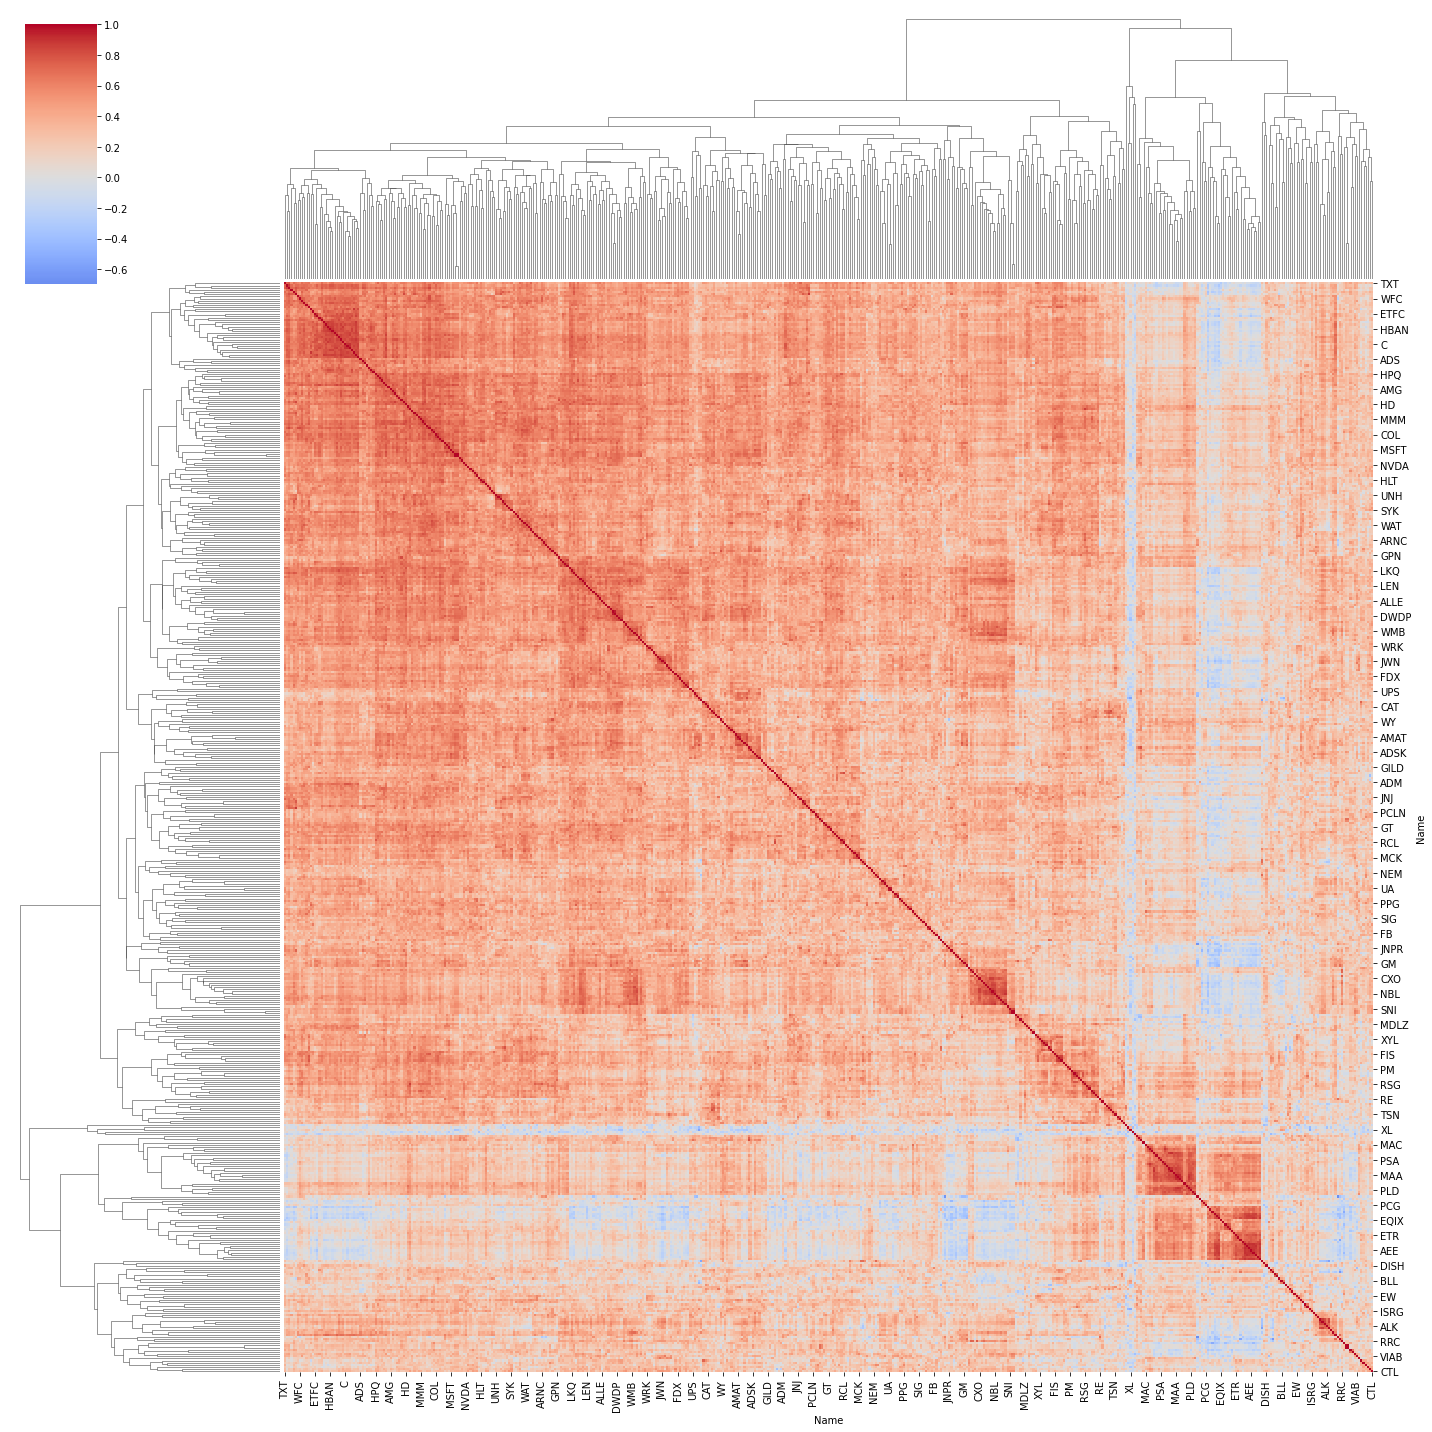

In [45]:
sns.clustermap(corr_matrix, cmap="coolwarm", center=0, figsize=(20, 20))
plt.show()